In [1]:
#loading libraries
library(psych)
library(reshape)
library(dplyr)
library(RColorBrewer)
library(gridExtra)
library(ggplot2)
#source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphic.R")
#source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myClustering.R")
#source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myBasic.R")
source("https://raw.githubusercontent.com/cefet-rj-dal/dal/main/R/clu_kmeans.R")
source("https://raw.githubusercontent.com/cefet-rj-dal/dal/main/R/clu_main.R")
source("https://raw.githubusercontent.com/cefet-rj-dal/dal/main/R/dal_main.R")
source("../funcoes_analise_ch.R")

#loading data
dados <-read.csv("event_export_2022-07-20.csv", header = TRUE, sep = ";")
head(dados)
nrow(dados)
ncol(dados)

Warning message:
"package 'reshape' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following object is masked from 'package:reshape':

    rename

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine


Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha



id,session,type,agent,time,attr1,attr2,attr3
21898,194,plantar,grama,3,252,225,325
21899,194,plantar,grama,5,254,275,327
21900,194,plantar,grama,7,256,325,326
21901,194,desenvolvimento,grama,10,257,225,325
21902,194,plantar,grama,9,258,375,326
21903,194,desenvolvimento,grama,12,259,275,327


[1] 484688

[1] 8

In [2]:
#List of players
players <- read.csv("player_export_2022-07-20.csv", header = TRUE, sep = ";")
head(players)
nrow(players)
ncol(players)

#Avaliation Join Tables
aval_turma_bio <- read.csv("join_tabelas_aval-2022-07-20.csv", header = TRUE, sep = ";")
head(aval_turma_bio)
nrow(aval_turma_bio)
ncol(aval_turma_bio)

#Avaliation Join Tables
aval_turma_info <- read.csv("join_tabelas_aval-2022-06-09.csv", header = TRUE, sep = ";")
head(aval_turma_info)
nrow(aval_turma_info)
ncol(aval_turma_info)


id,name,score,day,month,year,hour,minute,device,expcode
6,teste,255,16,7,2021,20,1,5,
7,teste,90,16,7,2021,20,3,5,
8,,400,22,7,2021,18,28,454,
9,test,765,22,7,2021,18,59,9,
10,Bob,400,6,8,2021,12,10,10,
11,Nicholas,0,11,8,2021,22,7,11,


[1] 539

[1] 10

email,name,key,grp,q1,q2,q3,q4,q5,q6,...,q39,q40,q41,q42,q43,q44,q45,q46,q47,q48
alexiavital57@gmail.com,Alexia da Silva Vital,95609edc,4,18,Eletrônica,4AELT,Escola Municipal João XXIII,0,10,...,1,2,4,2,4,1,1,2,1,"Bom, ele pode fazer a rotação de culturas sim, porém quando o arroz for plantado novamente muito provavelmente a praga dos gafanhotos voltará. Ele pode fazer um controle biológico com uma espécie predadora de gafanhotos na plantação de arroz assim não perdendo a plantação e nem fazendo o uso de agrotóxicos."
arthurkikuts@hotmail.com,Athur Fontes Rebelo Kikuts,1c8481c5,3,18,Eletrotécnica,4AEL,Colégio Curso Desafio,4,22,...,4,5,4,4,4,2,2,2,1,"Responderia para ele fazer nenhuma das opções e optar por investir em medidas de controle biológico, já que ampliando a plantação de arroz ou diversificando os cultivos pode servir como fator de ampliação da espécie de gafanhotos."
brenoej@gmail.com,Breno Junqueira,2c313a49,1,19,Eletrotécnica,4AEL,Colégio Palas,14,21,...,7,1,2,1,5,2,1,2,1,"Plantio alternado, variando a produção"
caiiocbarcelos@gmail.com,Caio Cunha Barcelos,a7a3a7ce,4,20,Eletrotécnica,4AEL,Escola Municipal Gil Vicente,20,10,...,7,1,3,1,3,2,1,2,1,"Alternar a plantação, assim diminuindo a incidência de gafanhotos e a perda da plantação, porém com atenção à outras espécies invasoras ao redor do novo plantio"
caion.oliveira9@gmail.com,Caio da Silva Nonato Oliveira,6d519978,1,18,Eletrotécnica,4AELINT,CEFET-RJ/Campus Maracanã,0,6,...,6,2,4,4,4,2,1,1,1,"Uma observação seria analisar corretamente a região, no auxílio de profissionais legalizados, pois conseguiria conservar o território para o determinado cultivo, mesmo que seja possível a presença de um novo cultivo."
carlosifsm@gmail.com,Carlos Ichiro Falcão de Souza Matsushita,95350bff,2,18,Eletrônica,4AELT,pH,5,15,...,2,1,4,3,4,2,1,2,1,outros cultivos


[1] 29

[1] 64

email,name,key,grp,q1,q2,q3,q4,q5,q6,...,q39,q40,q41,q42,q43,q44,q45,q46,q47,q48
kakarotokiiilll0099@gmail.com,Matheus Santos Paulino,0098a532,4,15,informática,1AINFO,CENTRO EDUCACIONAL CALIFORNIA,30,1,...,5,3,3,2,4,2,2,2,1,para você matar os gafanhotos utilize insetos que os gafanhotos são as presa deles e que a plantação são sege o alimentos dela
Jvaobito@gmail.com.br,João Vitor Antunes Pereira,014644f4,2,15,Informatica,1Ainfo/ Manha,"Prudente de Moraes, Orsina da Fonseca, Cefet",6,10,...,7,1,4,1,2,1,1,1,2,pensaria em expandi ou dividir o terreno para que a diversidade de produtos fosse maior
silvabreno966@gmail.com,Breno da Silva Assunção,053f01f8,3,15,informática,1binfo,cefet,5,2,...,7,5,2,5,6,1,1,1,1,"não, ia gastar arroz atoa"
raissadsa21@gmail.com,raissa de souza araujo,09705fc7,1,17,infotmática,1AINFO,Escola Municipal Governador Carlos Lacerda,7,10,...,7,1,3,1,1,1,2,1,1,para utilizar uma parte da área para plantar outros cultivos
p2droliveira@gmail.com,Pedro dos Santos de Oliveira,0a3e917c,3,16,Informática,1BINFO,Colégio curso ZeroHum,0,10,...,2,4,5,4,4,2,1,1,2,Acho que investir em outros cultivos seria mais eficiente.
joaolarrate@gmail.com,João Vitor Larrate Fontes,0b594314,4,15,informatica,1AINFO,Pensi,16,14,...,6,2,3,2,4,2,2,2,2,alternar os plantios


[1] 49

[1] 64

In [3]:
grp3_joel<-aval_turma_info %>% filter(grp==3)
#grp3_joel
nrow(grp3_joel)

##### filtrando turma do joel #####
set.seed(123)
grp3_joel<-sample_n(grp3_joel, 7)

aval_turma_info <- rbind(grp3_joel %>% select (key,grp),aval_turma_info %>% filter(grp==1|grp==2|grp==4) %>% select (key,grp))
nrow(aval_turma_info)

[1] 21

[1] 28

In [4]:
aval_participantes <- rbind(aval_turma_bio %>% select (key,grp),aval_turma_info %>% select (key,grp))
#aval_participantes
aval_participantes %>% select (grp) %>% group_by(grp) %>% summarise(n = n())
#aval_participantes <- aval_participantes %>% filter(grp!=0)
#aval_participantes %>% select (grp) %>% group_by(grp) %>% summarise(n = n())



grp,n
1,14
2,14
3,14
4,15


In [5]:

#### equilibrando os grupos
grp1<-aval_participantes %>% filter(grp==1)
grp2<-aval_participantes %>% filter(grp==2)
grp3<-aval_participantes %>% filter(grp==3)
grp4<-aval_participantes %>% filter(grp==4)

set.seed(123)
grp1<-sample_n(grp1, 14)
grp2<-sample_n(grp2, 14)
grp3<-sample_n(grp3, 14)
grp4<-sample_n(grp4, 14)

aval_participantes <- rbind(grp1,grp2)
aval_participantes <- rbind(aval_participantes,grp3)
aval_participantes <- rbind(aval_participantes,grp4)
aval_participantes
aval_participantes %>% select (grp) %>% group_by(grp) %>% summarise(n = n())


key,grp
facb93c1,1
916a23c3,1
284eaf3c,1
6d519978,1
dad336c3,1
57ded246,1
8d8806d1,1
75e991ed,1
b64109c1,1
2c313a49,1


grp,n
1,14
2,14
3,14
4,14


In [6]:
#aval_sessions_turma_bio <- players %>% filter (expcode %in% aval_turma_bio$key)
aval_sessions_2022 <- players %>% filter (expcode %in% aval_participantes$key)
head(aval_sessions_2022)
nrow(aval_sessions_2022)
ncol(aval_sessions_2022)

todas_sessoes <- aval_sessions_2022$id
todas_sessoes <- sort(todas_sessoes)
todas_sessoes

id,name,score,day,month,year,hour,minute,device,expcode
467,c6e166e0,1290,20,5,2022,17,9,467,c6e166e0
469,c48dbfd3,50,20,5,2022,17,15,469,c48dbfd3
472,c48dbfd3,85,20,5,2022,17,16,469,c48dbfd3
474,c48dbfd3,90,20,5,2022,17,18,469,c48dbfd3
475,c48dbfd3,85,20,5,2022,17,19,469,c48dbfd3
492,Pedro dos Santos,400,20,5,2022,17,31,492,0a3e917c


[1] 110

[1] 10

[1] 467 469 472 474 475 492 497 501 503 507 508 514 516 518 526 527 528 529
 [19] 530 531 532 534 537 538 539 540 541 542 543 544 545 546 547 548 549 550
 [37] 551 552 553 554 555 556 558 559 561 563 564 565 566 567 568 569 570 571
 [55] 572 573 576 577 578 579 580 581 582 583 584 585 586 588 590 591 592 593
 [73] 594 595 596 597 598 600 602 603 604 605 606 607 608 609 610 611 612 614
 [91] 615 616 617 618 622 623 626 627 628 629 631 632 633 634 635 637 638 639
[109] 640 641

In [7]:
dados$id <- NULL #removing the id column

#summary(dados)

#Turning categorical attributes into factors
cols = c("type", "agent")
fac.dados = dados
fac.dados[cols] = lapply(dados[cols], factor)

#Filtering events of actual avaliation sessions
fac.dados <- fac.dados %>% filter (session %in% todas_sessoes)

#plants
pop.plant = fac.dados[c(1,2,3,4)] %>% filter((type=="meta cumprida")|((type=="plantar"|type=="Predacao"|type=="colher") & (agent=="tomate"|agent=="tomate em desenvolvimento"|agent=="milho"|agent=="milho em desenvolvimento"|agent=="couve"|agent=="couve em desenvolvimento"|agent=="grama"|agent=="grama em desenvolvimento")))
pop.plant = pop.plant[order(pop.plant$session, pop.plant$time),]

#pests  
pop.plague = fac.dados[c(1,2,3,4)] %>% filter((type=="meta cumprida")|((type=="morte"|type=="Predacao"|type=="Novo inseto") & (agent=="grilo"|agent=="lagarta"|agent=="pulgao"|agent=="cigarrinha")))
pop.plague = pop.plague[order(pop.plague$session, pop.plague$time),]

#predators
pop.predator = fac.dados[c(1,2,3,4)] %>% filter((type=="meta cumprida")|((type=="morte"|type=="Novo inseto"|type=="remover predador") & (agent=="besouro"|agent=="joaninha")))
pop.predator = pop.predator[order(pop.predator$session, pop.predator$time),]

gap = 10


input <- fac.dados %>% filter(type=="meta cumprida") %>% group_by(session,type)
input = input[order(input$session, input$time),]
max_meta_time = 0
actual_session = 0
for(i in 1:nrow(input)){
    session <- input[i,]$session
    if(session != actual_session){
      actual_session <- session
      total_meta = 0
    }
    total_meta = total_meta + 1
    if(total_meta == 8){
        max_meta_time = max(input[i,]$time,max_meta_time)
    }
}
max_meta_time

[1] 980

In [8]:
#creating plant population series
#num_col = floor(max(pop.plant$time)/gap) + 2
num_col = floor(max_meta_time/gap) + 1
series.pop.plant <- create_dataframe(num_col, gap)
actual_session = 0
line = 0
total_plant = 0
total_meta = 0
for(i in 1:length(pop.plant$session)){
    session <- pop.plant[i,]$session
    if(session != actual_session){
      line = line + 1
      actual_session <- session
      total_plant = 0
      total_meta = 0
      series.pop.plant[line, 1] <- actual_session
    }
    if(pop.plant[i,]$type == "plantar"){
      total_plant = total_plant + 1
    }
    if(pop.plant[i,]$type == "Predacao" || pop.plant[i,]$type == "colher"){
      total_plant = total_plant - 1
    }
    if(pop.plant[i,]$type == "meta cumprida"){
      total_meta = total_meta + 1
    }
    if(total_meta < 8){
        col = floor(pop.plant[i,]$time/gap)+2
        if(total_plant < 0) total_plant = 0
        series.pop.plant[line, col] <- total_plant
    }
}
series.pop.plant <- fill_na(series.pop.plant, nrow(series.pop.plant), pop.plant)
#series.pop.plant

#creating pest population series
#num_col = floor(max(pop.plague$time)/gap) + 2
num_col = floor(max_meta_time/gap) + 1
series.pop.plague <- create_dataframe(num_col, gap)
actual_session = 0
line = 0
total_plague = 0
total_meta = 0
for(i in 1:length(pop.plague$session)){
  session <- pop.plague[i,]$session
  if(session != actual_session){
    line = line + 1
    actual_session <- session
    total_plague = 0
    total_meta = 0
    series.pop.plague[line, 1] <- actual_session
  }
  if(pop.plague[i,]$type == "Novo inseto"){
    total_plague = total_plague + 1
  }
  if(pop.plague[i,]$type == "Predacao" || pop.plague[i,]$type == "morte"){
    total_plague = total_plague - 1
  }
  if(pop.plague[i,]$type == "meta cumprida"){
      total_meta = total_meta + 1
  }
  if(total_meta < 8){
    col = floor(pop.plague[i,]$time/gap)+2
    if(total_plague<0) total_plague = 0
    series.pop.plague[line, col] <- total_plague
  }
}
series.pop.plague <- fill_na(series.pop.plague, nrow(series.pop.plague), pop.plague)

#creating predator population series
#num_col = floor(max(pop.predator$time)/gap) + 2
num_col = floor(max_meta_time/gap) + 1
series.pop.predator <- create_dataframe(num_col, gap)
actual_session = 0
line = 0
total_predator = 0
total_meta = 0
for(i in 1:length(pop.predator$session)){
  session <- pop.predator[i,]$session
  if(session != actual_session){
    line = line + 1
    actual_session <- session
    total_predator = 0
    total_meta = 0
    series.pop.predator[line, 1] <- actual_session
  }
  if(pop.predator[i,]$type == "Novo inseto"){
    total_predator = total_predator + 1
  }
  if(pop.predator[i,]$type == "morte" || pop.predator[i,]$type == "remover predador"){
    total_predator = total_predator - 1
  }
    if(pop.predator[i,]$type == "meta cumprida"){
      total_meta = total_meta + 1
    }
    if(total_meta < 8){
      col = floor(pop.predator[i,]$time/gap)+2
      if(total_predator < 0) total_predator = 0
      series.pop.predator[line, col] <- total_predator
    }
}
series.pop.predator <- fill_na(series.pop.predator, nrow(series.pop.predator), pop.predator)

var,n
1,51
2,4
3,35
4,17


TableGrob (3 x 1) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]
3 3 (3-3,1-1) arrange gtable[layout]

session,k
467,2
469,1
472,1
474,1
475,1
492,1
497,1
501,1
503,1
507,1


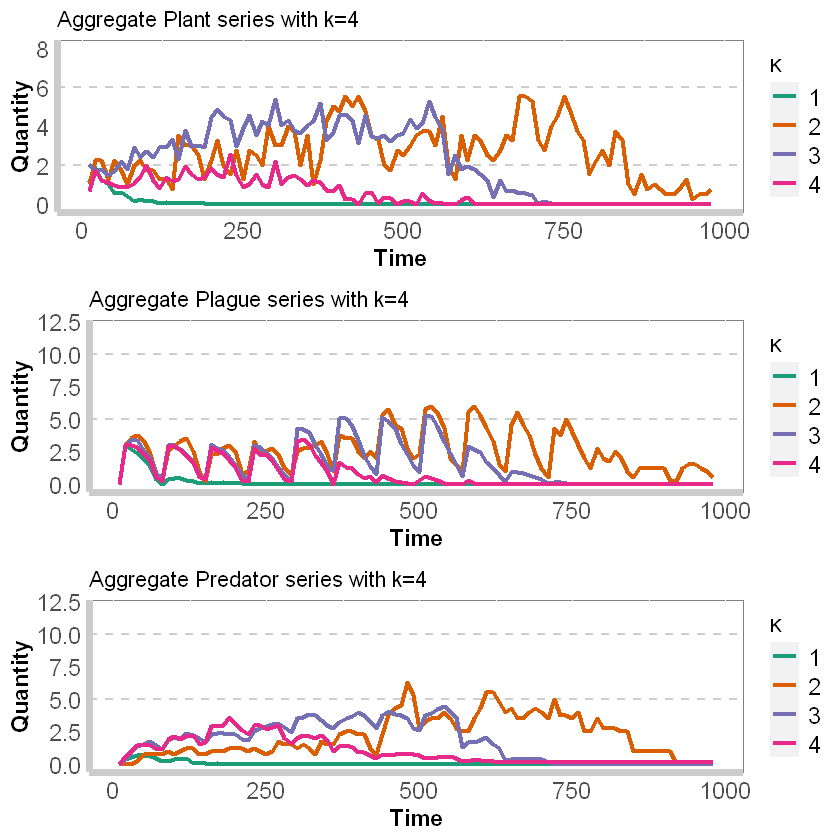

In [9]:
###############################
### Realizando a clusterizaçao
###############################

num_col <- min(ncol(series.pop.plant),ncol(series.pop.plant),ncol(series.pop.predator))  ##TOTAL DE COLUNAS

data_serie <- return_cluster_comb(series.pop.plant, series.pop.plague, series.pop.predator, todas_sessoes, 4, num_col)

###Winsorizing the series to remove outliers 2%
wseries.pop.plant <- series.pop.plant
wseries.pop.plant[,2:length(wseries.pop.plant)] <- psych::winsor(wseries.pop.plant[,2:length(wseries.pop.plant)], trim = 0.02)

wseries.pop.plague <- series.pop.plague
wseries.pop.plague[,2:length(wseries.pop.plague)] <- psych::winsor(wseries.pop.plague[,2:length(wseries.pop.plague)], trim = 0.02)

wseries.pop.predator <- series.pop.predator
wseries.pop.predator[,2:length(wseries.pop.predator)] <- psych::winsor(wseries.pop.predator[,2:length(wseries.pop.predator)], trim = 0.02)

#####APPLYING Z-SCORE
zscore_plant = wseries.pop.plant
zscore_plant[,2:length(zscore_plant)] = scale(zscore_plant[,2:length(zscore_plant)])
zscore_plant[is.na(zscore_plant)] <- 0

zscore_plague = wseries.pop.plague
zscore_plague[,2:length(zscore_plague)] = scale(zscore_plague[,2:length(zscore_plague)])
zscore_plague[is.na(zscore_plague)] <- 0

zscore_predator = wseries.pop.predator
zscore_predator[,2:length(zscore_predator)] = scale(zscore_predator[,2:length(zscore_predator)])
zscore_predator[is.na(zscore_predator)] <- 0


set.seed(222)

#####CLUSTERING WITH K=4
zdata_serie <- return_cluster_comb(zscore_plant, zscore_plague, zscore_predator, todas_sessoes, 4, num_col)
count(zdata_serie, var = k)
data_serie$k <- zdata_serie$k
line_cluster_sep(data_serie, 10, 99, "Aggregate Plant series with k=4", "Aggregate Plague series with k=4", "Aggregate Predator series with k=4",0,8,0,12,0,12)
data_serie %>% select(session, k)

k4_classification <- zdata_serie$k


In [10]:
#aval_session_info_eait <-read.csv2("session_data.csv", header = TRUE, sep = ";")
#colnames(aval_session_info_eait)[c(1,3,5)]<-c("expcode","id","score")
#nrow(aval_session_info_eait)
#nrow(aval_sessions_2022)
#aval_sessions<-rbind(aval_sessions_2022 %>% select (id,score,expcode),aval_session_info_eait %>% select (id,score,expcode))
aval_sessions<-aval_sessions_2022 %>% select (id,score,expcode)
aval_sessions
nrow(aval_sessions)

id,score,expcode
467,1290,c6e166e0
469,50,c48dbfd3
472,85,c48dbfd3
474,90,c48dbfd3
475,85,c48dbfd3
492,400,0a3e917c
497,80,0a3e917c
501,25,0a3e917c
503,220,0a3e917c
507,75,5b8a61b1


[1] 110

In [11]:
### Gerando dataset das estatisticas de jogo

#filtrando eventos dentro das 8 metas e contabilizando
eventos <- fac.dados[c(1,2,3,4)] %>% filter(time < max_meta_time)
event.quantity.data <- eventos %>% group_by(session,type) %>% summarise(n = n())
time_by_session <- fac.dados %>% select(session,time) %>% group_by(session) %>% summarise(across(everything(), list(max)))

#geranto dataset com sessoes classificadas e pontuacoes
x<-data_serie %>% select(session, k)
y<-aval_sessions %>% select(id, score)
game.data <- merge(x,y,by.x="session",by.y="id")

# adicionando coluna tempo
game.data <- merge(game.data,time_by_session,by.x="session",by.y="session")
max_meta_time
#game.data[game.data$time_1 > max_meta_time,]$time_1 <- max_meta_time
colnames(game.data)[ncol(game.data)] <- "time"

#adicionando predadores inseridos
pred <- event.quantity.data %>% filter(type=="inserir predador")
pred <- pred %>% select(session, n)
game.data <- merge(game.data, pred, by.x="session", by.y="session", all.x=TRUE) 
game.data[is.na(game.data)] <- 0
colnames(game.data)[ncol(game.data)] <- "Predadores"

#adicionando metas lançadas
pred <- event.quantity.data %>% filter(type=="meta lancada")
pred <- pred %>% select(session, n)
game.data <- merge(game.data, pred, by.x="session", by.y="session", all.x=TRUE) 
game.data[is.na(game.data)] <- 0
colnames(game.data)[ncol(game.data)] <- "Meta_lancada"

#adicionando metas cumpridas
pred <- event.quantity.data %>% filter(type=="meta cumprida")
pred <- pred %>% select(session, n)
game.data <- merge(game.data, pred, by.x="session", by.y="session", all.x=TRUE) 
game.data[is.na(game.data)] <- 0
#game.data[game.data$n > 8,]$n <- 8
colnames(game.data)[ncol(game.data)] <- "Meta_cumprida"

#adicionando Pontuacao / tempo
game.data$pontXtempo <- game.data$score / game.data$time

#adicionando plantas plantadas
pred <- event.quantity.data %>% filter(type=="plantar")
pred <- pred %>% select(session, n)
game.data <- merge(game.data, pred, by.x="session", by.y="session", all.x=TRUE) 
game.data[is.na(game.data)] <- 0
colnames(game.data)[ncol(game.data)] <- "Plantacoes"

#adicionando Plantas colhidas
pred <- event.quantity.data %>% filter(type=="colher")
pred <- pred %>% select(session, n)
game.data <- merge(game.data, pred, by.x="session", by.y="session", all.x=TRUE) 
game.data[is.na(game.data)] <- 0
colnames(game.data)[ncol(game.data)] <- "Colhidas"

#adicionando % planta colhida
game.data$percentColhida <- game.data$Colhidas / game.data$Plantacoes

#adicionando % meta cumprida
game.data$percentMetaCumprida <- game.data$Meta_cumprida / game.data$Meta_lancada

game.data[is.na(game.data)] <- 0
game.data

`summarise()` has grouped output by 'session'. You can override using the `.groups` argument.


[1] 980

session,k,score,time,Predadores,Meta_lancada,Meta_cumprida,pontXtempo,Plantacoes,Colhidas,percentColhida,percentMetaCumprida
467,2,1290,914,38,12,8,1.4113786,112,80,0.7142857,0.6666667
469,1,50,70,1,1,0,0.7142857,2,1,0.5000000,0.0000000
472,1,85,70,3,1,0,1.2142857,3,3,1.0000000,0.0000000
474,1,90,39,2,1,0,2.3076923,3,1,0.3333333,0.0000000
475,1,85,122,6,2,1,0.6967213,8,6,0.7500000,0.5000000
492,1,400,44,1,1,0,9.0909091,5,1,0.2000000,0.0000000
497,1,80,40,2,2,0,2.0000000,4,2,0.5000000,0.0000000
501,1,25,37,3,2,0,0.6756757,1,1,1.0000000,0.0000000
503,1,220,70,2,1,0,3.1428571,4,3,0.7500000,0.0000000
507,1,75,230,6,3,2,0.3260870,11,8,0.7272727,0.6666667


In [12]:
#analisando dados de jogo por agrupamento
game.data %>% select(k, score, time, Predadores, Meta_lancada, Meta_cumprida, pontXtempo, Plantacoes, Colhidas, percentColhida, percentMetaCumprida) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))

game.data %>% select(k, score, time, Predadores, Meta_lancada, Meta_cumprida, pontXtempo, Plantacoes, Colhidas, percentColhida, percentMetaCumprida) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean), .names = "{.fn}.{.col}"))

k,mean.score,sd.score,mean.time,sd.time,mean.Predadores,sd.Predadores,mean.Meta_lancada,sd.Meta_lancada,mean.Meta_cumprida,...,mean.pontXtempo,sd.pontXtempo,mean.Plantacoes,sd.Plantacoes,mean.Colhidas,sd.Colhidas,mean.percentColhida,sd.percentColhida,mean.percentMetaCumprida,sd.percentMetaCumprida
1,166.6667,270.7964,68.58824,41.66206,1.921569,2.067299,1.588235,0.6978960,0.2156863,...,3.328847,5.456916,5.941176,4.144451,3.078431,3.451626,0.4013563,0.32807121,0.1062092,0.25444844
2,5381.2500,6617.2859,876.00000,90.90655,27.500000,18.520259,12.250000,1.2583057,7.7500000,...,6.759945,8.689620,151.750000,57.296742,123.000000,59.115706,0.7886753,0.07920615,0.6401515,0.09770476
3,8209.5714,8530.8572,613.05714,57.54382,25.171429,13.091276,8.771429,0.8431633,7.7428571,...,13.001363,13.051229,145.428571,63.992318,122.057143,60.249942,0.8277447,0.09292868,0.8942424,0.15132808
4,1618.5294,1850.8290,399.17647,185.93320,18.000000,9.918417,5.882353,2.1178513,4.8235294,...,3.918664,3.981047,48.000000,24.578954,38.823529,18.648845,0.8172568,0.11570643,0.8076169,0.15574184


k,mean.score,mean.time,mean.Predadores,mean.Meta_lancada,mean.Meta_cumprida,mean.pontXtempo,mean.Plantacoes,mean.Colhidas,mean.percentColhida,mean.percentMetaCumprida
1,166.6667,68.58824,1.921569,1.588235,0.2156863,3.328847,5.941176,3.078431,0.4013563,0.1062092
2,5381.2500,876.00000,27.500000,12.250000,7.7500000,6.759945,151.750000,123.000000,0.7886753,0.6401515
3,8209.5714,613.05714,25.171429,8.771429,7.7428571,13.001363,145.428571,122.057143,0.8277447,0.8942424
4,1618.5294,399.17647,18.000000,5.882353,4.8235294,3.918664,48.000000,38.823529,0.8172568,0.8076169


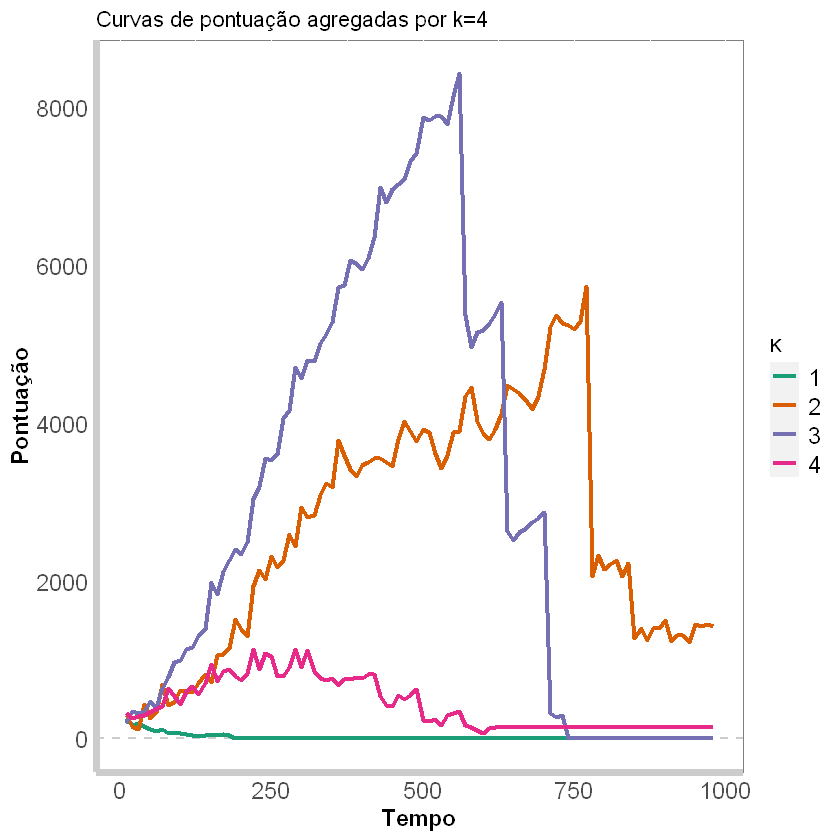

In [13]:
###########################
### Serie de pontuação ####
###########################

#filtrando eventos que alteram a pontuação
score_curve = fac.dados[c(1,2,3,4,7)] %>% filter(type=="meta cumprida"|type=="plantar"|type=="colher"|type=="remover predador"|type=="inserir predador"|type=="meta nao cumprida"|type=="multa")
score_curve = score_curve[order(score_curve$session, score_curve$time),]
#score_curve


#creating score curve series
num_col = floor(max_meta_time/gap) + 1
series.score_curve <- create_dataframe(num_col, gap)
actual_session = 0
line = 0
total_score = 400
total_meta = 0
for(i in 1:length(score_curve$session)){
    session <- score_curve[i,]$session
    if(session != actual_session){
      line = line + 1
      actual_session <- session
      total_score = 400
      total_meta = 0
      series.score_curve[line, 1] <- actual_session
    }
    
    if(score_curve[i,]$type == "plantar"){
        if(score_curve[i,]$agent == "couve"){
            total_score = total_score - 120
        }
        if(score_curve[i,]$agent == "milho"){
            total_score = total_score - 125
        }
        if(score_curve[i,]$agent == "tomate"){
            total_score = total_score - 150
        }
        if(score_curve[i,]$agent == "grama"){
            total_score = total_score -75
        }
    }
    
    if(score_curve[i,]$type == "colher"){
        if(score_curve[i,]$agent == "couve"){
            total_score = total_score + 230
        }
        if(score_curve[i,]$agent == "milho"){
            total_score = total_score + 240
        }
        if(score_curve[i,]$agent == "tomate"){
            total_score = total_score + 290
        }
        if(score_curve[i,]$agent == "grama"){
            total_score = total_score + 140
        }
    }
   
    if(score_curve[i,]$type == "remover predador"){
        total_score = total_score - 80
    }
    if(score_curve[i,]$type == "inserir predador"){
        total_score = total_score - 150
    }
   
    if(score_curve[i,]$type == "meta cumprida"){
        total_score = total_score + 300
        total_meta = total_meta + 1

    }
    if(score_curve[i,]$type == "meta nao cumprida"){
        total_score = total_score - 300
    }
    
    if(score_curve[i,]$type == "multa"){
        total_score = total_score - score_curve[i,]$attr3
    }
    
    if(total_meta < 8){
        col = floor(score_curve[i,]$time/gap)+2
        if(total_score < 0) total_score = 0
        series.score_curve[line, col] <- total_score
    }
}
series.score_curve <- fill_na_score(series.score_curve, nrow(series.score_curve), score_curve)
#series.score_curve

#### Adicionando classificação #######
class<-data_serie %>% select(session, k)
series.score_curve <- merge(series.score_curve, class, by.x="session",by.y="session")
#series.score_curve

#### Gerando plot das curvas #########

gap = 10
cols = num_col
title = "Curvas de pontuação agregadas por k=4"
linf = 0
linsup = 0

#calculating the averages
mean.series.score_curve <- as.data.frame(series.score_curve[,2:ncol(series.score_curve)] %>% group_by(k)%>% summarise(across(everything(), list(mean))))

#end x axis
end_x <- (cols-1)*10

#data plot
data_plot <- melt(mean.series.score_curve, id.vars = c(1))
data_plot <- data_plot[order(data_plot$k, data_plot$variable),]
#creating x axis
data_plot$x <- seq(from = 10, to = end_x, by = gap)

#plot
ggplot(data_plot, aes(x=x, y=value, group=k)) +
    geom_hline(yintercept =  2, linetype="dashed", color = "grey80", size=.7) + 
    geom_hline(yintercept =  6, linetype="dashed", color = "grey80", size=.7) +
    scale_color_brewer(palette="Dark2")+
    geom_line(aes(color=as.factor(k)), size = 1.25) +
    #ggtitle(title1)
    #labs(title=title1,x ="Time", y = "Quantity", color = "K")+
    labs(title=title,x ="Tempo", y = "Pontuação", color = "K")+
    #scale_y_continuous(limits = c(linf, lsup))+#, breaks = c(15,30), labels = c("20", "40")) +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
        axis.line = element_line(size = 2, colour = "grey80"),
        axis.ticks.x=element_blank(),
        axis.ticks.y=element_blank(),
        axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"),
        legend.text = element_text(size=14))
        #legend.position = "bottom")


In [14]:
#### Series classificadas

data_serie$k <- k4_classification
x<-data_serie %>% select(session, k)
y<-aval_sessions %>% select(id, expcode)
classified_sessions <- merge(x,y,by.x="session",by.y="id")
#classified_sessions


In [15]:
###########################################################################
####
####  ANALISANDO UEQ
####
###########################################################################

#importing UEQ Result
ueq_data <-read.csv2("resumo_UEQ _todas_turmas.csv", header = TRUE, sep = ";")
ueq_classified <- merge(classified_sessions, ueq_data, by.x="expcode", by.y="KEY")

#análise por agrupamento
ueq_classified %>% select(k, Atractividade, Transparência, Eficiência, Controlo, Estimulação, Inovação) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))

#análise gearal
ueq_data %>% select(Atractividade, Transparência, Eficiência, Controlo, Estimulação, Inovação) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))


k,mean.Atractividade,sd.Atractividade,mean.Transparência,sd.Transparência,mean.Eficiência,sd.Eficiência,mean.Controlo,sd.Controlo,mean.Estimulação,sd.Estimulação,mean.Inovação,sd.Inovação
1,1.447451,1.1613558,0.8921569,1.3474558,1.343137,1.1213394,1.093137,0.6781607,0.9607843,1.418954,0.5980392,1.148998
2,1.750000,0.9979646,1.5000000,1.0606602,1.875000,1.3616779,1.250000,1.2747549,1.2500000,1.274755,1.1875000,1.419727
3,1.884857,0.7779361,1.9000000,0.9667258,1.814286,0.9242303,1.392857,0.6867595,1.6500000,1.052308,0.7714286,1.289624
4,1.342353,1.2194288,1.6617647,1.0714373,1.176471,1.2335312,1.382353,0.7348344,1.1911765,1.537371,0.4117647,1.227743


mean.Atractividade,sd.Atractividade,mean.Transparência,sd.Transparência,mean.Eficiência,sd.Eficiência,mean.Controlo,sd.Controlo,mean.Estimulação,sd.Estimulação,mean.Inovação,sd.Inovação
1.491039,1.228142,1.376623,1.341778,1.392857,1.223017,1.11039,1.009408,1.162338,1.384694,0.6266234,1.361249


In [16]:
###########################################################################
####
####  ANALISANDO DESEMPENHO TEORICO
####
###########################################################################


desempenho_teorico <- read.csv("avaliacao_teorica_turma_joel_myrna_leo.csv", header = TRUE, sep = ";")
desempenho_teorico[is.na(desempenho_teorico)] <- 0
desempenho_teorico <- desempenho_teorico %>% filter(grp==1|grp==2|grp==3|grp==4)
desempenho_teorico <- desempenho_teorico %>% filter(id %in% aval_participantes$key)


desempenho_teorico_e_ueq <- merge(desempenho_teorico, ueq_data[,c(1,3:8)], by.x="id", by.y="KEY")
desempenho_teorico_e_ueq

#classified_sessions

desempenho_teorico_e_jogo <- merge(desempenho_teorico,classified_sessions[,2:3],by.x="id",by.y="expcode")
desempenho_teorico_e_jogo <- desempenho_teorico_e_jogo %>% filter(session %in% aval_sessions$id)
desempenho_teorico_e_jogo

nrow(desempenho_teorico)
nrow(desempenho_teorico_e_jogo)

id,grp,idade,horas.de.jogo,horas.de.estudo,conhecimento.previo,ex_fixacao_q1,ex_fixacao_q2,ex_fixacao_q3,ex_fixacao_q4,...,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4,form_teoria_cbXagrotóxicos,form_teoria_rotacao_de_cultivos,Atractividade,Transparência,Eficiência,Controlo,Estimulação,Inovação
0098a532,4,15,30,1,A,0,0,0,0,...,0,1,0.0,C,0.83,2.00,-0.25,0.75,0.50,0.25
014644f4,2,15,6,10,A,0,0,0,0,...,1,0,0.0,B,2.17,1.25,3.00,1.25,1.00,0.25
09705fc7,1,17,7,10,D,0,0,0,1,...,1,1,1.0,B,2.67,1.50,2.25,1.25,3.00,-2.25
0a3e917c,3,16,0,10,C,0,0,0,0,...,1,0,0.5,B,0.17,-1.75,-0.50,0.00,0.00,0.75
0b594314,4,15,16,14,A,0,0,0,0,...,0,0,0.5,B,1.33,2.25,1.00,1.00,0.50,0.25
0f862da6,1,15,2,1,A,0,0,0,0,...,1,0,0.5,C,2.00,3.00,3.00,3.00,3.00,1.50
11034587,3,17,2,36,B,0,0,0,0,...,1,0,0.0,C,-1.67,-0.75,-0.50,0.75,-2.50,-0.50
1c8481c5,3,18,4,22,C,0,0,0,0,...,0,1,1.0,C,0.33,0.25,0.00,-0.50,0.00,0.25
284eaf3c,1,16,1,11,B,0,1,0,0,...,1,1,0.5,C,1.50,1.50,0.50,2.25,2.75,1.50
2c313a49,1,19,14,21,A,0,1,1,0,...,0,1,0.5,B,1.83,3.00,2.50,2.00,1.50,1.50


id,grp,idade,horas.de.jogo,horas.de.estudo,conhecimento.previo,ex_fixacao_q1,ex_fixacao_q2,ex_fixacao_q3,ex_fixacao_q4,...,form_desempenho_cadeia_alimentar_grilo,form_desempenho_cadeia_alimentar_lagarta,form_teoria_especies_p_manejo,form_teoria_caracteristica_desejada_q1,form_teoria_caracteristica_desejada_q2,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4,form_teoria_cbXagrotóxicos,form_teoria_rotacao_de_cultivos,k
0098a532,4,15,30,1,A,0,0,0,0,...,0.0,1.0,0.75,1,0,0,1,0.0,C,1
0098a532,4,15,30,1,A,0,0,0,0,...,0.0,1.0,0.75,1,0,0,1,0.0,C,4
014644f4,2,15,6,10,A,0,0,0,0,...,0.0,0.0,5.00,0,1,1,0,0.0,B,1
014644f4,2,15,6,10,A,0,0,0,0,...,0.0,0.0,5.00,0,1,1,0,0.0,B,4
014644f4,2,15,6,10,A,0,0,0,0,...,0.0,0.0,5.00,0,1,1,0,0.0,B,3
014644f4,2,15,6,10,A,0,0,0,0,...,0.0,0.0,5.00,0,1,1,0,0.0,B,1
09705fc7,1,17,7,10,D,0,0,0,1,...,0.0,1.0,0.75,0,0,1,1,1.0,B,3
0a3e917c,3,16,0,10,C,0,0,0,0,...,0.0,0.0,0.50,1,1,1,0,0.5,B,1
0a3e917c,3,16,0,10,C,0,0,0,0,...,0.0,0.0,0.50,1,1,1,0,0.5,B,1
0a3e917c,3,16,0,10,C,0,0,0,0,...,0.0,0.0,0.50,1,1,1,0,0.5,B,1


[1] 56

[1] 107

Group,TQ1,Q10_sd,TQ2,Q11_sd,n
1,0.4464286,0.3692322,0.5357143,0.3078640,14
2,0.8214286,1.2573957,0.2857143,0.4258153,14
3,0.5357143,0.3231031,0.6071429,0.4462912,14
4,0.4821429,0.3856100,0.5000000,0.4803845,14


Group,Question,value,sd,n
1,TQ1,0.4464286,0.3692322,14
2,TQ1,0.8214286,1.2573957,14
3,TQ1,0.5357143,0.3231031,14
4,TQ1,0.4821429,0.3856100,14
1,TQ2,0.5357143,0.3078640,14
2,TQ2,0.2857143,0.4258153,14
3,TQ2,0.6071429,0.4462912,14
4,TQ2,0.5000000,0.4803845,14


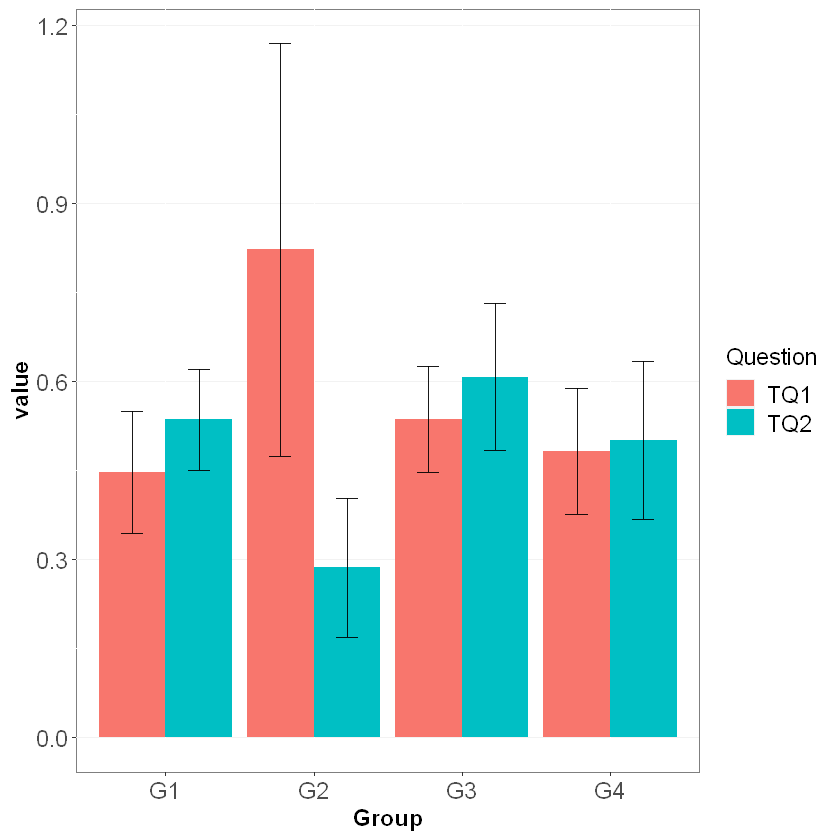

In [25]:
######################
### Questoes 10 e 11
######################


#### Analise por grupo ######

group_data <- desempenho_teorico %>% select (grp,form_teoria_especies_p_manejo,form_teoria_cbXagrotóxicos)
n <- count(group_data, var = grp)
group_data <- group_data %>% group_by(grp) %>% summarise(across(everything(), list(mean,sd)))
group_data$n <- n$n
colnames(group_data) <- c("Group", "TQ1", "Q10_sd", "TQ2", "Q11_sd", "n")
group_data

#melt(as.data.frame(group_data), id.vars = "Group", measure.vars = c("Q10_mean", "Q11_mean"))
#group_data_melt <- melt(as.data.frame(group_data), id=c("Group"))
group_data_melt <- melt(as.data.frame(group_data[,c('Group', 'TQ1', 'TQ2')]), id.vars = c(1))
#group_data_melt

group_data_melt$sd <- group_data$Q10_sd
group_data_melt[5:8,4] <- group_data$Q11_sd
group_data_melt$n <- group_data$n
colnames(group_data_melt)[2] <- "Question"
group_data_melt

#Calculando o intervalo de confianca
#alpha=0.05
#t <- qt((1-alpha)/2 + .5, n-1)
alpha <- 1.680

ggplot(group_data_melt, aes(fill=Question, y=value, x=Group)) + 
    geom_bar(position="dodge", stat="identity") +
    scale_x_discrete(labels = c("G1", "G2", "G3", "G4")) +
    labs(color = "Question") +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=14),
          axis.title=element_text(size=14,face="bold"),
          legend.title = element_text(size=14),
          legend.text = element_text(size=14)) +
          geom_errorbar( aes(ymin=value-(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)), ymax=ifelse(value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)) < 0, 0, value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)))), width=0.3, position=position_dodge(.9), colour="black", alpha=0.9, size=0.5)
  

K,TQ1,Q10_sd,TQ2,Q11_sd,n
1,0.6274510,0.9531167,0.4215686,0.4286321,51
2,0.4375000,0.5153882,0.7500000,0.5000000,4
3,0.6428571,0.8231166,0.5285714,0.4011538,35
4,0.6911765,1.1776878,0.5000000,0.4330127,17


K,Question,value,sd,n
1,TQ1,0.6274510,0.9531167,51
2,TQ1,0.4375000,0.5153882,4
3,TQ1,0.6428571,0.8231166,35
4,TQ1,0.6911765,1.1776878,17
1,TQ2,0.4215686,0.4286321,51
2,TQ2,0.7500000,0.5000000,4
3,TQ2,0.5285714,0.4011538,35
4,TQ2,0.5000000,0.4330127,17


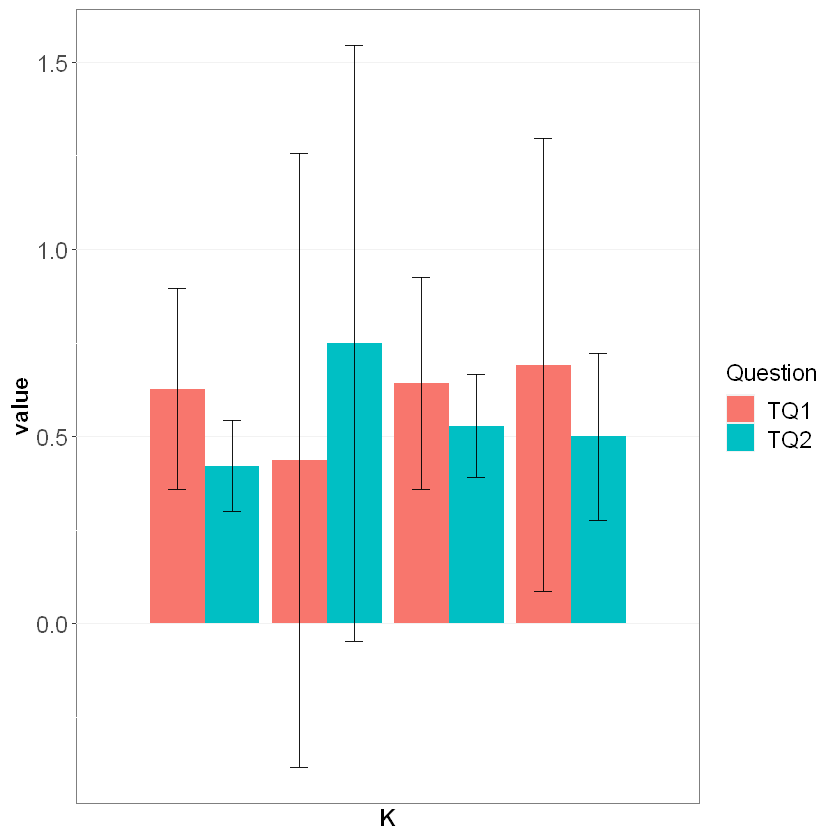

In [18]:
#### Analise por perfil de jogo ######

k_data <- desempenho_teorico_e_jogo %>% select (k,form_teoria_especies_p_manejo,form_teoria_cbXagrotóxicos)
n <- count(k_data, var = k)
k_data <- k_data %>% group_by(k) %>% summarise(across(everything(), list(mean,sd)))
k_data$n <- n$n
colnames(k_data) <- c("K", "TQ1", "Q10_sd", "TQ2", "Q11_sd", "n")
k_data

#melt(as.data.frame(group_data), id.vars = "Group", measure.vars = c("Q10_mean", "Q11_mean"))
#group_data_melt <- melt(as.data.frame(group_data), id=c("Group"))
k_data_melt <- melt(as.data.frame(k_data[,c('K', 'TQ1', 'TQ2')]), id.vars = c(1))
#group_data_melt

k_data_melt$sd <- k_data$Q10_sd
k_data_melt[5:8,4] <- k_data$Q11_sd
k_data_melt$n <- k_data$n
colnames(k_data_melt)[2] <- "Question"
k_data_melt

#Calculando o intervalo de confianca
alpha=0.05
#t <- qt((1-alpha)/2 + .5, n-1)

ggplot(k_data_melt, aes(fill=Question, y=value, x=K)) + 
    geom_bar(position="dodge", stat="identity") +
    scale_x_discrete(labels = c("K1", "K2", "K3", "K4")) +
    labs(color = "Question") +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=14),
          axis.title=element_text(size=14,face="bold"),
          legend.title = element_text(size=14),
          legend.text = element_text(size=14)) +
    geom_errorbar( aes(ymin=value-(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)), ymax=value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n))), width=0.3, position=position_dodge(.9), colour="black", alpha=0.9, size=0.5)
  

grp,mean.idade,sd.idade,mean.horas.de.jogo,sd.horas.de.jogo,mean.horas.de.estudo,sd.horas.de.estudo
1,17.07143,1.685426,5.928571,8.315549,7.714286,7.528700
2,17.00000,1.797434,6.357143,10.195075,7.928571,5.165928
3,16.78571,1.368805,8.428571,9.748485,10.357143,10.073630
4,16.92857,1.817195,8.714286,8.809336,9.571429,7.186679


`summarise()` has grouped output by 'grp'. You can override using the `.groups` argument.


grp,conhecimento.previo,n
1,A,8
1,B,1
1,D,5
2,A,6
2,AC,2
2,B,2
2,C,1
2,D,3
3,A,5
3,AC,1


`summarise()` has grouped output by 'grp'. You can override using the `.groups` argument.


k,mean.idade,sd.idade,mean.horas.de.jogo,sd.horas.de.jogo,mean.horas.de.estudo,sd.horas.de.estudo
1,16.82353,1.633473,9.078431,10.966938,9.627451,6.849703
2,17.75000,2.061553,3.000000,1.825742,13.500000,8.698659
3,17.45714,1.559466,7.742857,8.548625,8.885714,7.136367
4,16.58824,1.734172,10.941176,11.475357,7.882353,5.134228


`summarise()` has grouped output by 'k'. You can override using the `.groups` argument.


k,conhecimento.previo,n
1,A,26
1,AC,3
1,B,6
1,C,4
1,D,12
2,A,1
2,C,1
2,D,2
3,A,20
3,AC,4


`summarise()` has grouped output by 'k'. You can override using the `.groups` argument.


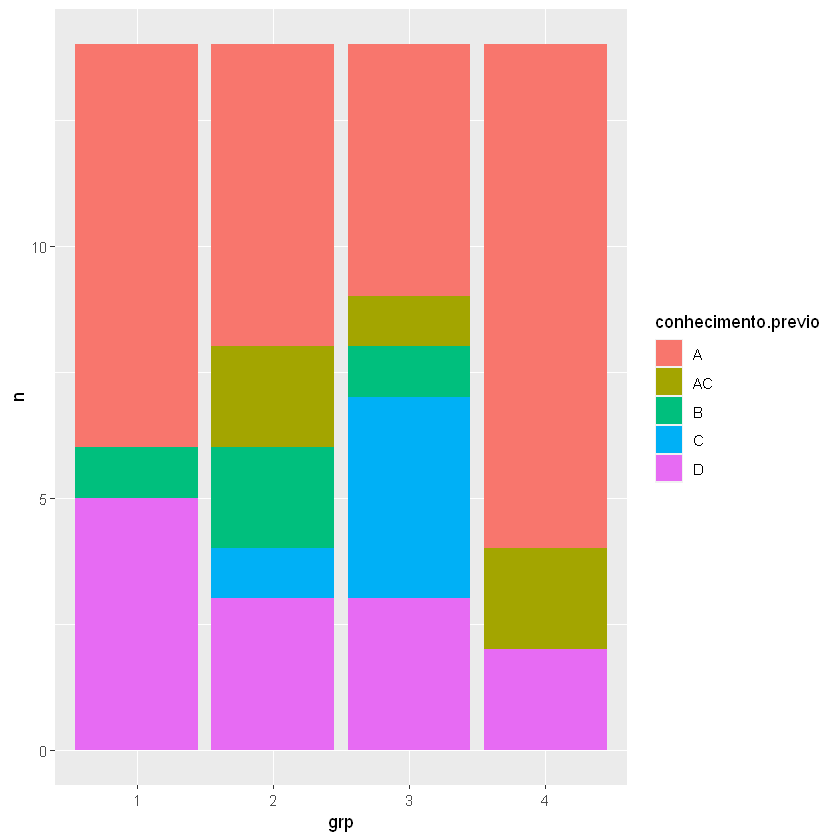

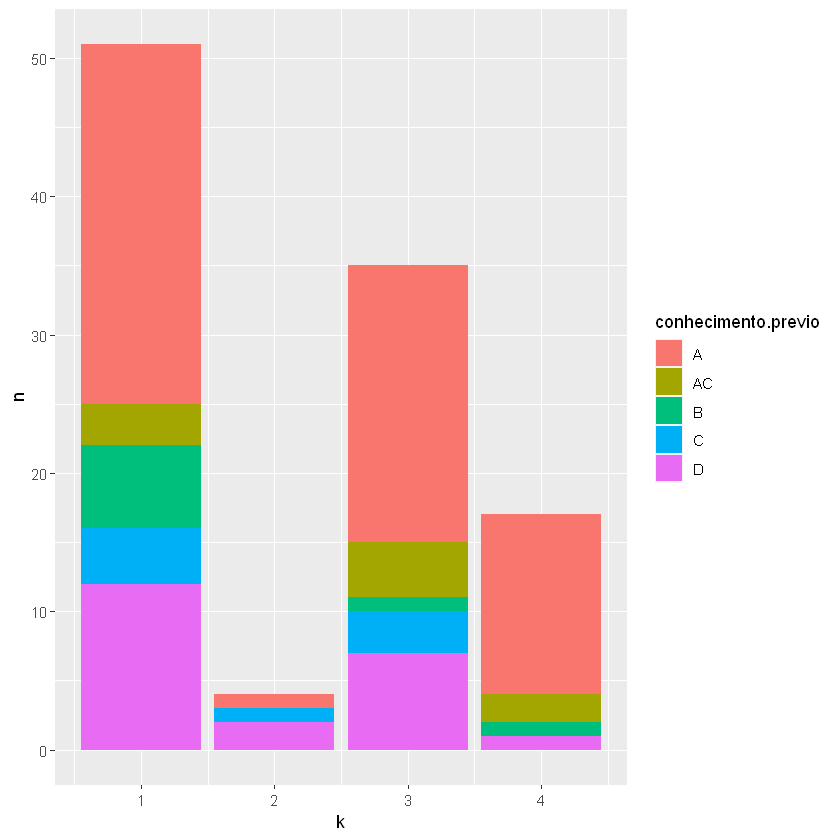

In [19]:
#########################################
####                                #####
####    PERFIL Dos Participantes    #####
####                                #####
#########################################


#### PERFIL POR GRUPO DA AVALIACAO
desempenho_teorico %>% select(grp,idade,horas.de.jogo,horas.de.estudo) %>% group_by(grp) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
desempenho_teorico %>% select(grp, conhecimento.previo) %>% group_by(grp,conhecimento.previo) %>% summarise(n = n())
resultado <- desempenho_teorico %>% select(grp, conhecimento.previo) %>% group_by(grp,conhecimento.previo) %>% summarise(n = n())
ggplot(resultado, aes(x = grp, y = n, fill = conhecimento.previo)) + 
  geom_bar(stat = "identity")

#### PERFIL POR CLASSIFICACAO DO DESEMPENHO
desempenho_teorico_e_jogo %>% select(k,idade,horas.de.jogo,horas.de.estudo) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
desempenho_teorico_e_jogo %>% select(k, conhecimento.previo) %>% group_by(k,conhecimento.previo) %>% summarise(n = n())
resultado<-desempenho_teorico_e_jogo %>% select(k, conhecimento.previo) %>% group_by(k,conhecimento.previo) %>% summarise(n = n())
ggplot(resultado, aes(x = k, y = n, fill = conhecimento.previo)) + 
  geom_bar(stat = "identity")


`summarise()` has grouped output by 'grp'. You can override using the `.groups` argument.


grp,form_teoria_rotacao_de_cultivos,n
1,B,7
1,C,7
2,0,1
2,A,1
2,B,9
2,C,3
3,A,1
3,B,7
3,C,6
4,0,1


`summarise()` has grouped output by 'k'. You can override using the `.groups` argument.


k,form_teoria_rotacao_de_cultivos,n
1,0,4
1,A,4
1,B,25
1,C,18
2,B,3
2,C,1
3,0,1
3,A,1
3,B,23
3,C,10


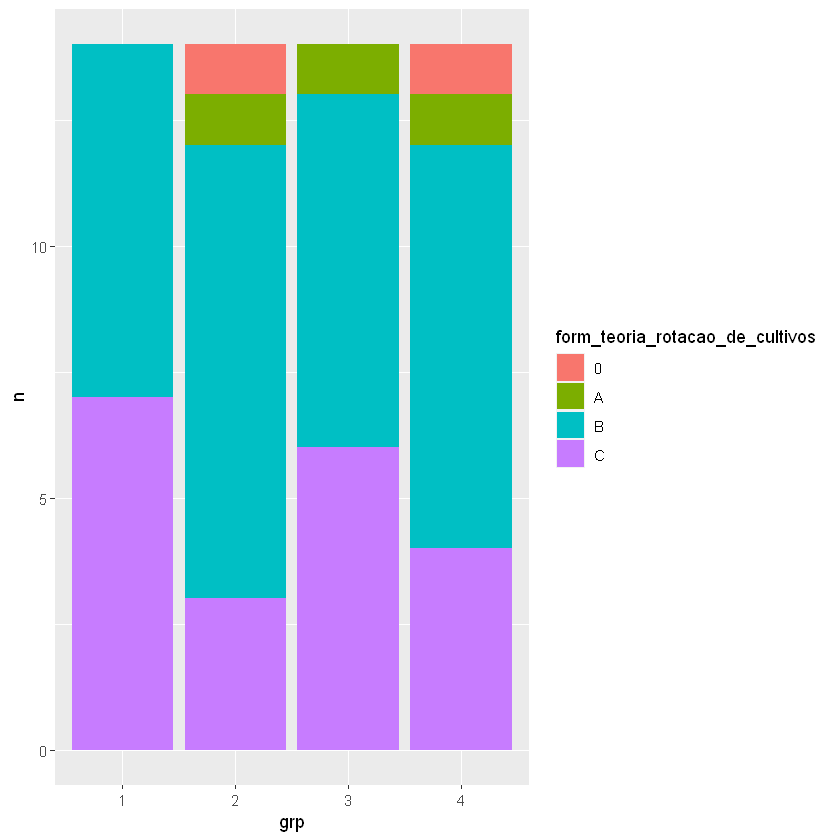

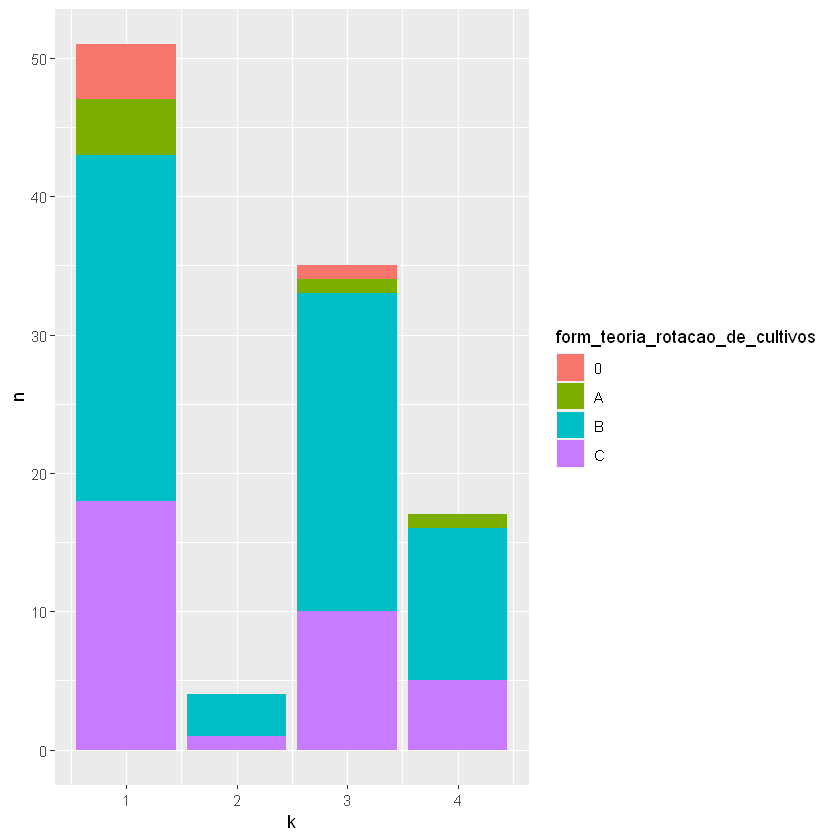

In [20]:
##############################################################
####                                                     #####
####    DESEMPENHO QUESTAO teoria_rotacao_de_cultivos    #####
####                                                     #####
##############################################################

#### DESEMPENHO QUESTAO teoria_rotacao_de_cultivos POR GRUPO
resposta_grupo <-desempenho_teorico %>% select(grp, form_teoria_rotacao_de_cultivos) %>% group_by(grp,form_teoria_rotacao_de_cultivos) %>% summarise(n = n())
resposta_grupo

#### DESEMPENHO QUESTAO teoria_cbXagrotóxicos POR CLASSIFICAÇÃO
resposta_perfil <- desempenho_teorico_e_jogo %>% select(k, form_teoria_rotacao_de_cultivos) %>% group_by(k,form_teoria_rotacao_de_cultivos) %>% summarise(n = n())
resposta_perfil

#Pergunta sobre a rotação de cultivos
#(i) plantar mais arroz             A
#(ii) sugerir plantios alternados.  B
#(ii) Outra resposta.               C
# 0 -> não respondeu

ggplot(resposta_grupo, aes(x = grp, y = n, fill = form_teoria_rotacao_de_cultivos)) + 
  geom_bar(stat = "identity")

ggplot(resposta_perfil, aes(x = k, y = n, fill = form_teoria_rotacao_de_cultivos)) + 
  geom_bar(stat = "identity")

grp,mean.form_teoria_caracteristica_desejada_q1,sd.form_teoria_caracteristica_desejada_q1,mean.form_teoria_caracteristica_desejada_q2,sd.form_teoria_caracteristica_desejada_q2,mean.form_teoria_caracteristica_desejada_q3,sd.form_teoria_caracteristica_desejada_q3,mean.form_teoria_caracteristica_desejada_q4,sd.form_teoria_caracteristica_desejada_q4
1,0.7142857,0.4688072,0.8571429,0.3631365,0.6428571,0.4972452,0.7142857,0.4688072
2,0.6428571,0.4972452,0.6428571,0.4972452,0.6428571,0.4972452,0.5714286,0.5135526
3,0.7142857,0.4688072,0.5000000,0.5188745,0.7142857,0.4688072,0.7142857,0.4688072
4,0.6428571,0.4972452,0.4285714,0.5135526,0.5000000,0.5188745,0.6428571,0.4972452


grp,variable,value,sd,n
1,mean.form_teoria_caracteristica_desejada_q1,0.7142857,0.4688072,14
2,mean.form_teoria_caracteristica_desejada_q1,0.6428571,0.4972452,14
3,mean.form_teoria_caracteristica_desejada_q1,0.7142857,0.4688072,14
4,mean.form_teoria_caracteristica_desejada_q1,0.6428571,0.4972452,14
1,mean.form_teoria_caracteristica_desejada_q2,0.8571429,0.3631365,14
2,mean.form_teoria_caracteristica_desejada_q2,0.6428571,0.4972452,14
3,mean.form_teoria_caracteristica_desejada_q2,0.5000000,0.5188745,14
4,mean.form_teoria_caracteristica_desejada_q2,0.4285714,0.5135526,14
1,mean.form_teoria_caracteristica_desejada_q3,0.6428571,0.4972452,14
2,mean.form_teoria_caracteristica_desejada_q3,0.6428571,0.4972452,14


k,mean.form_teoria_caracteristica_desejada_q1,sd.form_teoria_caracteristica_desejada_q1,mean.form_teoria_caracteristica_desejada_q2,sd.form_teoria_caracteristica_desejada_q2,mean.form_teoria_caracteristica_desejada_q3,sd.form_teoria_caracteristica_desejada_q3,mean.form_teoria_caracteristica_desejada_q4,sd.form_teoria_caracteristica_desejada_q4
1,0.5490196,0.5025426,0.6078431,0.4930895,0.6666667,0.4760952,0.4705882,0.5041008
2,0.7500000,0.5000000,0.5000000,0.5773503,0.5000000,0.5773503,0.5000000,0.5773503
3,0.8000000,0.4058397,0.6571429,0.4815940,0.6857143,0.4710082,0.6571429,0.4815940
4,0.4705882,0.5144958,0.6470588,0.4925922,0.4705882,0.5144958,0.7647059,0.4372373


k,variable,value,sd,n
1,mean.form_teoria_caracteristica_desejada_q1,0.5490196,0.5025426,51
2,mean.form_teoria_caracteristica_desejada_q1,0.7500000,0.5000000,4
3,mean.form_teoria_caracteristica_desejada_q1,0.8000000,0.4058397,35
4,mean.form_teoria_caracteristica_desejada_q1,0.4705882,0.5144958,17
1,mean.form_teoria_caracteristica_desejada_q2,0.6078431,0.4930895,51
2,mean.form_teoria_caracteristica_desejada_q2,0.5000000,0.5773503,4
3,mean.form_teoria_caracteristica_desejada_q2,0.6571429,0.4815940,35
4,mean.form_teoria_caracteristica_desejada_q2,0.6470588,0.4925922,17
1,mean.form_teoria_caracteristica_desejada_q3,0.6666667,0.4760952,51
2,mean.form_teoria_caracteristica_desejada_q3,0.5000000,0.5773503,4


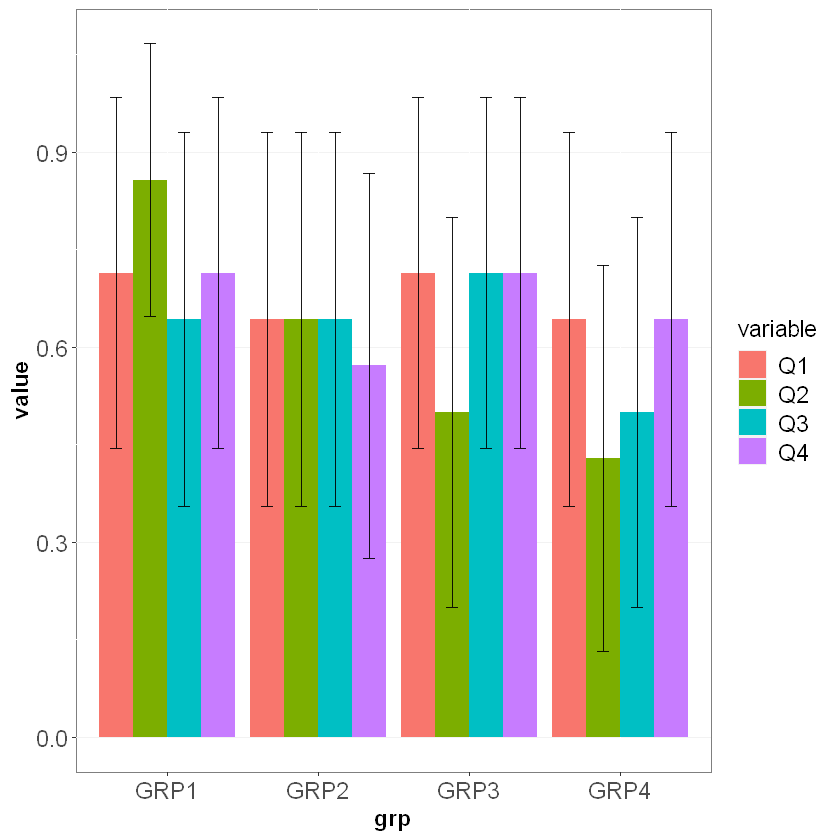

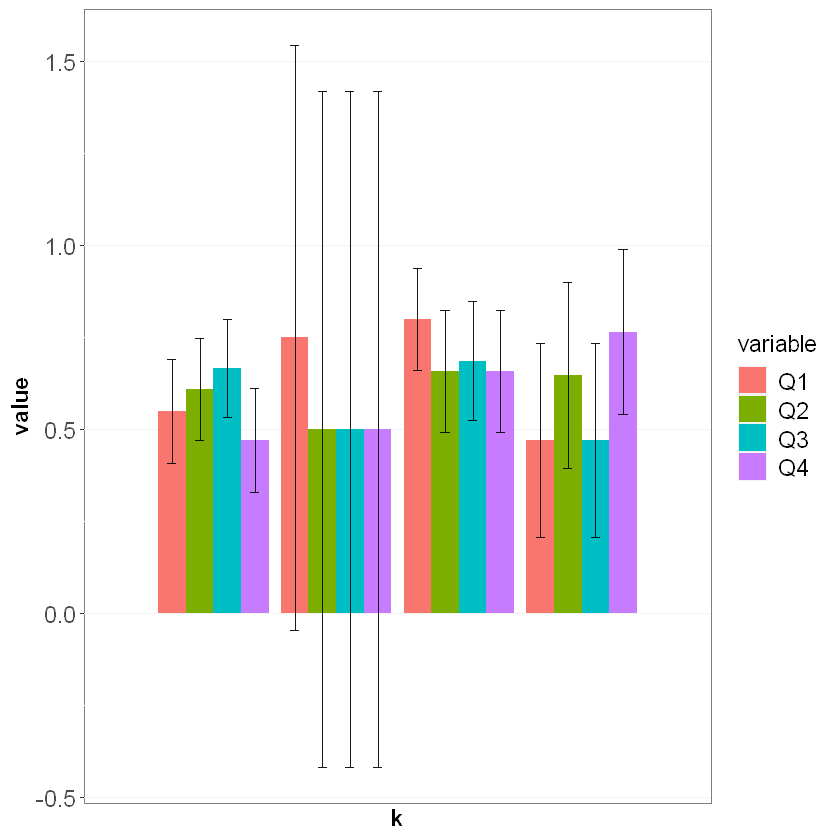

In [21]:
##############################################################
####                                                     #####
#### DESEMPENHO QUESTAO teoria_caracteristica_desejada   #####
####                                                     #####
##############################################################

#### DESEMPENHO QUESTAO teoria_caracteristica_desejada POR GRUPO
desempenho_teorico %>% select(grp,form_teoria_caracteristica_desejada_q1,form_teoria_caracteristica_desejada_q2,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4) %>% group_by(grp) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
resultado <- desempenho_teorico %>% select(grp,form_teoria_caracteristica_desejada_q1,form_teoria_caracteristica_desejada_q2,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4) %>% group_by(grp) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
resultado_melt<-melt(as.data.frame(resultado[,c(1,2,4,6,8)]), id.vars = c(1))
resultado_melt$sd <- 0
resultado_melt[1:4,4] <- resultado[,3]
resultado_melt[5:8,4] <- resultado[,5]
resultado_melt[9:12,4] <- resultado[,7]
resultado_melt[13:16,4] <- resultado[,9]
resultado_melt$n <- group_data$n
resultado_melt

ggplot(resultado_melt, aes(fill=variable, y=value, x=grp)) + 
    scale_fill_discrete(labels = c("Q1", "Q2","Q3","Q4")) +
    geom_bar(position="dodge", stat="identity") +
    scale_x_discrete(labels = c("GRP1", "GRP2", "GRP3", "GRP4")) +
    labs(color = "Question") +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=14),
          axis.title=element_text(size=14,face="bold"),
          legend.title = element_text(size=14),
          legend.text = element_text(size=14)) +
    geom_errorbar( aes(ymin=value-(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)), ymax=value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n))), width=0.3, position=position_dodge(.9), colour="black", alpha=0.9, size=0.5)
 

#### DESEMPENHO QUESTAO teoria_caracteristica_desejada POR CLASSIFICAÇÃO
desempenho_teorico_e_jogo %>% select(k,form_teoria_caracteristica_desejada_q1,form_teoria_caracteristica_desejada_q2,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
resultado<-desempenho_teorico_e_jogo %>% select(k,form_teoria_caracteristica_desejada_q1,form_teoria_caracteristica_desejada_q2,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
resultado_melt<-melt(as.data.frame(resultado[,c(1,2,4,6,8)]), id.vars = c(1))
resultado_melt$sd <- 0
resultado_melt[1:4,4] <- resultado[,3]
resultado_melt[5:8,4] <- resultado[,5]
resultado_melt[9:12,4] <- resultado[,7]
resultado_melt[13:16,4] <- resultado[,9]
resultado_melt$n <- k_data$n
resultado_melt

ggplot(resultado_melt, aes(fill=variable, y=value, x=k)) + 
    scale_fill_discrete(labels = c("Q1", "Q2","Q3","Q4")) +
    geom_bar(position="dodge", stat="identity") +
    scale_x_discrete(labels = c("K1", "K2", "K3", "K4")) +
    labs(color = "Question") +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=14),
          axis.title=element_text(size=14,face="bold"),
          legend.title = element_text(size=14),
          legend.text = element_text(size=14)) +
    geom_errorbar( aes(ymin=value-(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)), ymax=value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n))), width=0.3, position=position_dodge(.9), colour="black", alpha=0.9, size=0.5)
 

In [22]:
###########################################################
####                                                  #####
#### DESEMPENHO QUESTAO desempenho_cadeia_alimentar   #####
####                                                  #####
###########################################################

#### DESEMPENHO QUESTAO desempenho_cadeia_alimentar POR GRUPO
desempenho_teorico %>% select(grp,form_desempenho_cadeia_alimentar_besouro,form_desempenho_cadeia_alimentar_joaninha,form_desempenho_cadeia_alimentar_cigarrinha,form_desempenho_cadeia_alimentar_pulgao,form_desempenho_cadeia_alimentar_grilo,form_desempenho_cadeia_alimentar_lagarta) %>% group_by(grp) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))

#### DESEMPENHO QUESTAO desempenho_cadeia_alimentar POR CLASSIFICAÇÃO
desempenho_teorico_e_jogo %>% select(k,form_desempenho_cadeia_alimentar_besouro,form_desempenho_cadeia_alimentar_joaninha,form_desempenho_cadeia_alimentar_cigarrinha,form_desempenho_cadeia_alimentar_pulgao,form_desempenho_cadeia_alimentar_grilo,form_desempenho_cadeia_alimentar_lagarta) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))


grp,mean.form_desempenho_cadeia_alimentar_besouro,sd.form_desempenho_cadeia_alimentar_besouro,mean.form_desempenho_cadeia_alimentar_joaninha,sd.form_desempenho_cadeia_alimentar_joaninha,mean.form_desempenho_cadeia_alimentar_cigarrinha,sd.form_desempenho_cadeia_alimentar_cigarrinha,mean.form_desempenho_cadeia_alimentar_pulgao,sd.form_desempenho_cadeia_alimentar_pulgao,mean.form_desempenho_cadeia_alimentar_grilo,sd.form_desempenho_cadeia_alimentar_grilo,mean.form_desempenho_cadeia_alimentar_lagarta,sd.form_desempenho_cadeia_alimentar_lagarta
1,0.3571429,0.4008919,0.4285714,0.4209487,0.2142857,0.4258153,0.1428571,0.3631365,0.3571429,0.4972452,0.2500000,0.4274252
2,0.3928571,0.4353854,0.4464286,0.4064217,0.4285714,0.4746311,0.1250000,0.2900597,0.2500000,0.4274252,0.1071429,0.2894671
3,0.3750000,0.3501373,0.4107143,0.3873870,0.5714286,0.5135526,0.2857143,0.4688072,0.3214286,0.4643914,0.2500000,0.4274252
4,0.4107143,0.2520520,0.3928571,0.2723524,0.5357143,0.4986245,0.5000000,0.5188745,0.4285714,0.5135526,0.4464286,0.5017141


k,mean.form_desempenho_cadeia_alimentar_besouro,sd.form_desempenho_cadeia_alimentar_besouro,mean.form_desempenho_cadeia_alimentar_joaninha,sd.form_desempenho_cadeia_alimentar_joaninha,mean.form_desempenho_cadeia_alimentar_cigarrinha,sd.form_desempenho_cadeia_alimentar_cigarrinha,mean.form_desempenho_cadeia_alimentar_pulgao,sd.form_desempenho_cadeia_alimentar_pulgao,mean.form_desempenho_cadeia_alimentar_grilo,sd.form_desempenho_cadeia_alimentar_grilo,mean.form_desempenho_cadeia_alimentar_lagarta,sd.form_desempenho_cadeia_alimentar_lagarta
1,0.3284314,0.3552823,0.3578431,0.3509092,0.6176471,0.4752708,0.1617647,0.3529289,0.2549020,0.4401426,0.2352941,0.4165686
2,0.3125000,0.2393568,0.2500000,0.2886751,0.7500000,0.5000000,0.7500000,0.5000000,0.3750000,0.4787136,0.1250000,0.2500000
3,0.4500000,0.3419236,0.4714286,0.3471069,0.3857143,0.4863688,0.2428571,0.4265358,0.4000000,0.4970501,0.2357143,0.4241898
4,0.3970588,0.3542027,0.4117647,0.3846790,0.4705882,0.4831727,0.3823529,0.4850713,0.4411765,0.4963099,0.4117647,0.5072997


grp,mean.form_desempenho_cadeia_alimentar_besouro,sd.form_desempenho_cadeia_alimentar_besouro,mean.form_desempenho_cadeia_alimentar_joaninha,sd.form_desempenho_cadeia_alimentar_joaninha,mean.form_desempenho_cadeia_alimentar_cigarrinha,sd.form_desempenho_cadeia_alimentar_cigarrinha,mean.form_desempenho_cadeia_alimentar_pulgao,sd.form_desempenho_cadeia_alimentar_pulgao,mean.form_desempenho_cadeia_alimentar_grilo,sd.form_desempenho_cadeia_alimentar_grilo,mean.form_desempenho_cadeia_alimentar_lagarta,sd.form_desempenho_cadeia_alimentar_lagarta
1,0.3571429,0.4008919,0.4285714,0.4209487,0.2142857,0.4258153,0.1428571,0.3631365,0.3571429,0.4972452,0.2500000,0.4274252
2,0.3928571,0.4353854,0.4464286,0.4064217,0.4285714,0.4746311,0.1250000,0.2900597,0.2500000,0.4274252,0.1071429,0.2894671
3,0.3750000,0.3501373,0.4107143,0.3873870,0.5714286,0.5135526,0.2857143,0.4688072,0.3214286,0.4643914,0.2500000,0.4274252
4,0.4107143,0.2520520,0.3928571,0.2723524,0.5357143,0.4986245,0.5000000,0.5188745,0.4285714,0.5135526,0.4464286,0.5017141


grp,variable,value,sd,n
1,mean.form_desempenho_cadeia_alimentar_besouro,0.3571429,0.4008919,14
2,mean.form_desempenho_cadeia_alimentar_besouro,0.3928571,0.4353854,14
3,mean.form_desempenho_cadeia_alimentar_besouro,0.3750000,0.3501373,14
4,mean.form_desempenho_cadeia_alimentar_besouro,0.4107143,0.2520520,14
1,mean.form_desempenho_cadeia_alimentar_joaninha,0.4285714,0.4209487,14
2,mean.form_desempenho_cadeia_alimentar_joaninha,0.4464286,0.4064217,14
3,mean.form_desempenho_cadeia_alimentar_joaninha,0.4107143,0.3873870,14
4,mean.form_desempenho_cadeia_alimentar_joaninha,0.3928571,0.2723524,14
1,mean.form_desempenho_cadeia_alimentar_cigarrinha,0.2142857,0.4258153,14
2,mean.form_desempenho_cadeia_alimentar_cigarrinha,0.4285714,0.4746311,14


k,mean.form_desempenho_cadeia_alimentar_besouro,sd.form_desempenho_cadeia_alimentar_besouro,mean.form_desempenho_cadeia_alimentar_joaninha,sd.form_desempenho_cadeia_alimentar_joaninha,mean.form_desempenho_cadeia_alimentar_cigarrinha,sd.form_desempenho_cadeia_alimentar_cigarrinha,mean.form_desempenho_cadeia_alimentar_pulgao,sd.form_desempenho_cadeia_alimentar_pulgao,mean.form_desempenho_cadeia_alimentar_grilo,sd.form_desempenho_cadeia_alimentar_grilo,mean.form_desempenho_cadeia_alimentar_lagarta,sd.form_desempenho_cadeia_alimentar_lagarta
1,0.3284314,0.3552823,0.3578431,0.3509092,0.6176471,0.4752708,0.1617647,0.3529289,0.2549020,0.4401426,0.2352941,0.4165686
2,0.3125000,0.2393568,0.2500000,0.2886751,0.7500000,0.5000000,0.7500000,0.5000000,0.3750000,0.4787136,0.1250000,0.2500000
3,0.4500000,0.3419236,0.4714286,0.3471069,0.3857143,0.4863688,0.2428571,0.4265358,0.4000000,0.4970501,0.2357143,0.4241898
4,0.3970588,0.3542027,0.4117647,0.3846790,0.4705882,0.4831727,0.3823529,0.4850713,0.4411765,0.4963099,0.4117647,0.5072997


k,variable,value,sd,n
1,mean.form_desempenho_cadeia_alimentar_besouro,0.3284314,0.3552823,51
2,mean.form_desempenho_cadeia_alimentar_besouro,0.3125000,0.2393568,4
3,mean.form_desempenho_cadeia_alimentar_besouro,0.4500000,0.3419236,35
4,mean.form_desempenho_cadeia_alimentar_besouro,0.3970588,0.3542027,17
1,mean.form_desempenho_cadeia_alimentar_joaninha,0.3578431,0.3509092,51
2,mean.form_desempenho_cadeia_alimentar_joaninha,0.2500000,0.2886751,4
3,mean.form_desempenho_cadeia_alimentar_joaninha,0.4714286,0.3471069,35
4,mean.form_desempenho_cadeia_alimentar_joaninha,0.4117647,0.3846790,17
1,mean.form_desempenho_cadeia_alimentar_cigarrinha,0.6176471,0.4752708,51
2,mean.form_desempenho_cadeia_alimentar_cigarrinha,0.7500000,0.5000000,4


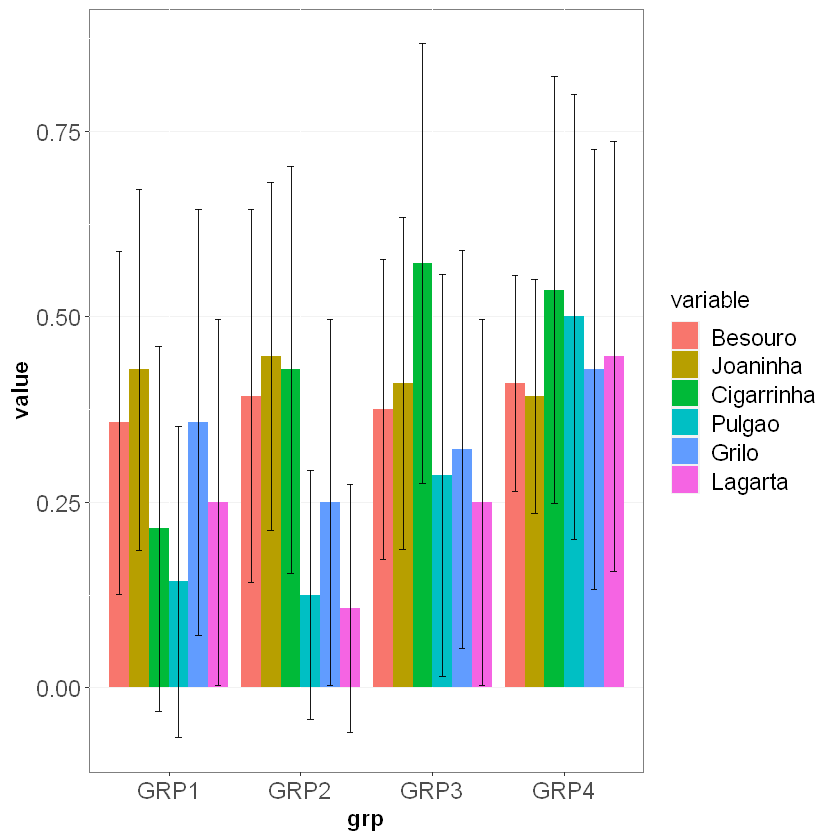

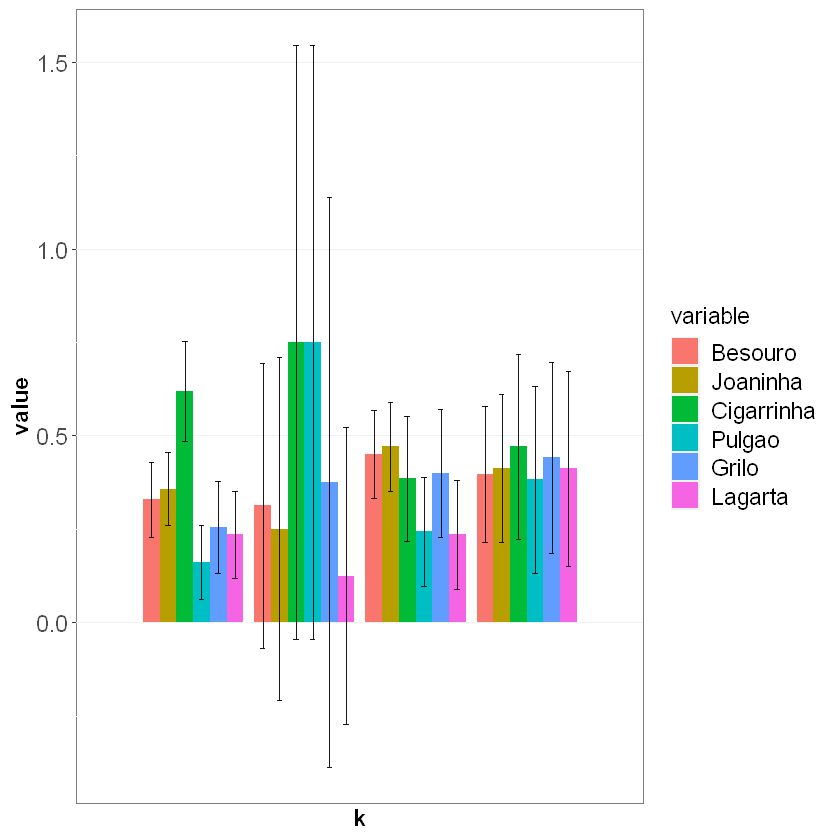

In [23]:
###########################################################
####                                                  #####
#### DESEMPENHO QUESTAO desempenho_cadeia_alimentar   #####
####                                                  #####
###########################################################

#### DESEMPENHO QUESTAO desempenho_cadeia_alimentar POR GRUPO
desempenho_teorico %>% select(grp,form_desempenho_cadeia_alimentar_besouro,form_desempenho_cadeia_alimentar_joaninha,form_desempenho_cadeia_alimentar_cigarrinha,form_desempenho_cadeia_alimentar_pulgao,form_desempenho_cadeia_alimentar_grilo,form_desempenho_cadeia_alimentar_lagarta) %>% group_by(grp) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
resultado <- desempenho_teorico %>% select(grp,form_desempenho_cadeia_alimentar_besouro,form_desempenho_cadeia_alimentar_joaninha,form_desempenho_cadeia_alimentar_cigarrinha,form_desempenho_cadeia_alimentar_pulgao,form_desempenho_cadeia_alimentar_grilo,form_desempenho_cadeia_alimentar_lagarta) %>% group_by(grp) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
resultado_melt<-melt(as.data.frame(resultado[,c(1,2,4,6,8,10,12)]), id.vars = c(1))
resultado_melt$sd <- 0
resultado_melt[1:4,4] <- resultado[,3]
resultado_melt[5:8,4] <- resultado[,5]
resultado_melt[9:12,4] <- resultado[,7]
resultado_melt[13:16,4] <- resultado[,9]
resultado_melt[17:20,4] <- resultado[,11]
resultado_melt[21:24,4] <- resultado[,13]                                             
resultado_melt$n <- group_data$n
resultado_melt

ggplot(resultado_melt, aes(fill=variable, y=value, x=grp)) + 
    scale_fill_discrete(labels = c("Besouro", "Joaninha","Cigarrinha","Pulgao","Grilo","Lagarta")) +
    geom_bar(position="dodge", stat="identity") +
    scale_x_discrete(labels = c("GRP1", "GRP2", "GRP3", "GRP4")) +
    labs(color = "Question") +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=14),
          axis.title=element_text(size=14,face="bold"),
          legend.title = element_text(size=14),
          legend.text = element_text(size=14)) +
    geom_errorbar( aes(ymin=value-(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)), ymax=value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n))), width=0.3, position=position_dodge(.9), colour="black", alpha=0.9, size=0.5)
 

#### DESEMPENHO QUESTAO teoria_caracteristica_desejada POR CLASSIFICAÇÃO
desempenho_teorico_e_jogo %>% select(k,form_desempenho_cadeia_alimentar_besouro,form_desempenho_cadeia_alimentar_joaninha,form_desempenho_cadeia_alimentar_cigarrinha,form_desempenho_cadeia_alimentar_pulgao,form_desempenho_cadeia_alimentar_grilo,form_desempenho_cadeia_alimentar_lagarta) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
resultado<-desempenho_teorico_e_jogo %>% select(k,form_desempenho_cadeia_alimentar_besouro,form_desempenho_cadeia_alimentar_joaninha,form_desempenho_cadeia_alimentar_cigarrinha,form_desempenho_cadeia_alimentar_pulgao,form_desempenho_cadeia_alimentar_grilo,form_desempenho_cadeia_alimentar_lagarta) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
resultado_melt<-melt(as.data.frame(resultado[,c(1,2,4,6,8,10,12)]), id.vars = c(1))
resultado_melt$sd <- 0
resultado_melt[1:4,4] <- resultado[,3]
resultado_melt[5:8,4] <- resultado[,5]
resultado_melt[9:12,4] <- resultado[,7]
resultado_melt[13:16,4] <- resultado[,9]
resultado_melt[17:20,4] <- resultado[,11]
resultado_melt[21:24,4] <- resultado[,13]  
resultado_melt$n <- k_data$n
resultado_melt

ggplot(resultado_melt, aes(fill=variable, y=value, x=k)) + 
    scale_fill_discrete(labels = c("Besouro", "Joaninha","Cigarrinha","Pulgao","Grilo","Lagarta")) +
    geom_bar(position="dodge", stat="identity") +
    scale_x_discrete(labels = c("K1", "K2", "K3", "K4")) +
    labs(color = "Question") +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=14),
          axis.title=element_text(size=14,face="bold"),
          legend.title = element_text(size=14),
          legend.text = element_text(size=14)) +
    geom_errorbar( aes(ymin=value-(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)), ymax=value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n))), width=0.3, position=position_dodge(.9), colour="black", alpha=0.9, size=0.5)
 

In [24]:
######################################################
#####
##### Análise da pontuação geral
#####
######################################################


#### SOMA PONTUACAO desempenho_cadeia_alimentar POR GRUPO
pontuacao_total <- desempenho_teorico  %>% mutate(cadeia_alimentar_total = select(., form_desempenho_cadeia_alimentar_besouro,form_desempenho_cadeia_alimentar_joaninha,form_desempenho_cadeia_alimentar_cigarrinha,form_desempenho_cadeia_alimentar_pulgao,form_desempenho_cadeia_alimentar_grilo,form_desempenho_cadeia_alimentar_lagarta) %>% rowSums(na.rm = TRUE))
pontuacao_total <- pontuacao_total  %>% mutate(caracteristica_desejada_total = select(., form_teoria_caracteristica_desejada_q1,form_teoria_caracteristica_desejada_q2,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4) %>% rowSums(na.rm = TRUE))
pontuacao_total <- pontuacao_total[,c("grp","form_teoria_especies_p_manejo","form_teoria_cbXagrotóxicos","cadeia_alimentar_total","caracteristica_desejada_total")]
pontuacao_total <- pontuacao_total  %>% mutate(total = select(., form_teoria_especies_p_manejo,form_teoria_cbXagrotóxicos,cadeia_alimentar_total,caracteristica_desejada_total) %>% rowSums(na.rm = TRUE))
#pontuacao_total
pontuacao_total <- pontuacao_total  %>% mutate(
  total_normalizado = form_teoria_especies_p_manejo+form_teoria_cbXagrotóxicos+(cadeia_alimentar_total/6)+(caracteristica_desejada_total/4),
  media_normalizada = total_normalizado/4
 )
pontuacao_total
pontuacao_total %>% group_by(grp) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))



#### DESEMPENHO QUESTAO desempenho_cadeia_alimentar POR CLASSIFICAÇÃO
pontuacao_total <- desempenho_teorico_e_jogo  %>% mutate(cadeia_alimentar_total = select(., form_desempenho_cadeia_alimentar_besouro,form_desempenho_cadeia_alimentar_joaninha,form_desempenho_cadeia_alimentar_cigarrinha,form_desempenho_cadeia_alimentar_pulgao,form_desempenho_cadeia_alimentar_grilo,form_desempenho_cadeia_alimentar_lagarta) %>% rowSums(na.rm = TRUE))
pontuacao_total <- pontuacao_total  %>% mutate(caracteristica_desejada_total = select(., form_teoria_caracteristica_desejada_q1,form_teoria_caracteristica_desejada_q2,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4) %>% rowSums(na.rm = TRUE))
pontuacao_total <- pontuacao_total[,c("k","form_teoria_especies_p_manejo","form_teoria_cbXagrotóxicos","cadeia_alimentar_total","caracteristica_desejada_total")]
pontuacao_total <- pontuacao_total  %>% mutate(total = select(., form_teoria_especies_p_manejo,form_teoria_cbXagrotóxicos,cadeia_alimentar_total,caracteristica_desejada_total) %>% rowSums(na.rm = TRUE))
#pontuacao_total
pontuacao_total <- pontuacao_total  %>% mutate(
  total_normalizado = form_teoria_especies_p_manejo+form_teoria_cbXagrotóxicos+(cadeia_alimentar_total/6)+(caracteristica_desejada_total/4),
  media_normalizada = total_normalizado/4
 )
pontuacao_total
pontuacao_total %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))



grp,form_teoria_especies_p_manejo,form_teoria_cbXagrotóxicos,cadeia_alimentar_total,caracteristica_desejada_total,total,total_normalizado,media_normalizada
3,0.50,0.0,1.00,2,3.50,1.1666667,0.29166667
3,0.50,0.0,2.50,2,5.00,1.4166667,0.35416667
3,0.00,1.0,4.00,1,6.00,1.9166667,0.47916667
3,0.00,0.0,0.00,1,1.00,0.2500000,0.06250000
3,0.50,0.5,0.00,3,4.00,1.7500000,0.43750000
3,0.50,1.0,6.00,4,11.50,3.5000000,0.87500000
3,0.75,0.5,3.00,4,8.25,2.7500000,0.68750000
1,0.00,0.0,2.50,2,4.50,0.9166667,0.22916667
1,0.75,1.0,2.00,2,5.75,2.5833333,0.64583333
1,0.00,0.5,0.50,3,4.00,1.3333333,0.33333333


grp,mean.form_teoria_especies_p_manejo,sd.form_teoria_especies_p_manejo,mean.form_teoria_cbXagrotóxicos,sd.form_teoria_cbXagrotóxicos,mean.cadeia_alimentar_total,sd.cadeia_alimentar_total,mean.caracteristica_desejada_total,sd.caracteristica_desejada_total,mean.total,sd.total,mean.total_normalizado,sd.total_normalizado,mean.media_normalizada,sd.media_normalizada
1,0.4464286,0.3692322,0.5357143,0.3078640,1.750000,1.0875166,2.928571,0.8287419,5.660714,1.328704,2.005952,0.6549159,0.5014881,0.1637290
2,0.8214286,1.2573957,0.2857143,0.4258153,1.750000,0.8204127,2.500000,0.6504436,5.357143,1.833750,2.023810,1.3530902,0.5059524,0.3382726
3,0.5357143,0.3231031,0.6071429,0.4462912,2.214286,1.9010552,2.642857,1.0082081,6.000000,2.880638,2.172619,0.9533534,0.5431548,0.2383384
4,0.4821429,0.3856100,0.5000000,0.4803845,2.714286,1.8236089,2.214286,1.4238934,5.910714,3.244236,1.988095,1.2455507,0.4970238,0.3113877


k,form_teoria_especies_p_manejo,form_teoria_cbXagrotóxicos,cadeia_alimentar_total,caracteristica_desejada_total,total,total_normalizado,media_normalizada
1,0.75,0.0,3.00,2,5.75,1.7500000,0.4375000
4,0.75,0.0,3.00,2,5.75,1.7500000,0.4375000
1,5.00,0.0,3.00,2,10.00,6.0000000,1.5000000
4,5.00,0.0,3.00,2,10.00,6.0000000,1.5000000
3,5.00,0.0,3.00,2,10.00,6.0000000,1.5000000
1,5.00,0.0,3.00,2,10.00,6.0000000,1.5000000
3,0.75,1.0,2.00,2,5.75,2.5833333,0.6458333
1,0.50,0.5,0.00,3,4.00,1.7500000,0.4375000
1,0.50,0.5,0.00,3,4.00,1.7500000,0.4375000
1,0.50,0.5,0.00,3,4.00,1.7500000,0.4375000


k,mean.form_teoria_especies_p_manejo,sd.form_teoria_especies_p_manejo,mean.form_teoria_cbXagrotóxicos,sd.form_teoria_cbXagrotóxicos,mean.cadeia_alimentar_total,sd.cadeia_alimentar_total,mean.caracteristica_desejada_total,sd.caracteristica_desejada_total,mean.total,sd.total,mean.total_normalizado,sd.total_normalizado,mean.media_normalizada,sd.media_normalizada
1,0.6274510,0.9531167,0.4215686,0.4286321,1.955882,1.507237,2.294118,0.9229110,5.299020,2.449500,1.948529,1.1676362,0.4871324,0.2919090
2,0.4375000,0.5153882,0.7500000,0.5000000,2.562500,1.196784,2.250000,0.9574271,6.000000,1.414214,2.177083,0.9118402,0.5442708,0.2279600
3,0.6428571,0.8231166,0.5285714,0.4011538,2.185714,1.432736,2.800000,1.1324102,6.157143,2.320058,2.235714,1.0985890,0.5589286,0.2746472
4,0.6911765,1.1776878,0.5000000,0.4330127,2.514706,1.821037,2.352941,0.8617697,6.058824,2.725071,2.198529,1.3297094,0.5496324,0.3324273
